In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import glob
import os
from PIL import Image
from utils import show_gt, show_map
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import random
from utils import RandomCrop, RandomFlip, Resize, ResizeVal, LabelNormalize, ToTensor, DynamicNormalize, DynamicNormalizeVal, CrowdsDataset, train_transform, val_transform
from config import folder_path, gt_data_test_path, gt_data_val_path, gt_data_train_path, image_data_test_path, image_data_train_path, image_data_val_path, density_data_test_path, density_data_train_path, density_data_val_path

In [2]:
"""gt_data_train_path = './processed_data/train/gt'
image_data_train_path = './processed_data/train/img'
density_data_train_path = './processed_data/train/den'

gt_data_val_path = './processed_data/val/gt'
image_data_val_path = './processed_data/val/img'
density_data_val_path = './processed_data/val/den'

gt_data_test_path = './processed_data/test/gt'
image_data_test_path = './processed_data/test/img'
density_data_test_path = './processed_data/test/den'"""

In [3]:
#lista dei nomi delle immagini nel trainset
images = []
num_images = 0

#lettura e inserimento delle immagini nella lista
for image_name in glob.glob(os.path.join(image_data_train_path, '*.jpg')):
    image = Image.open(image_name)
    np_image = np.asarray(image)
    images.append(image_name)

num_images = len(images)
print(num_images)

2272


./processed_data/train/img\1072.jpg
Number of people (groundtruth): 117
./processed_data/train/den\1072.csv
(689, 1024)
Number of people predicted: 116.99961108000001


116.99961108000001

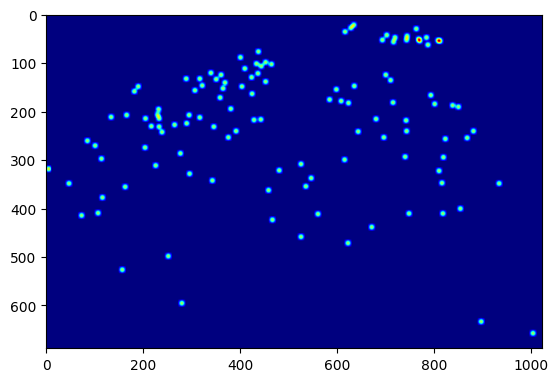

In [4]:
#visualizzare un'immagine
random_number = np.random.randint(0,num_images)
#print(random_number)
#images[random_number] = '/content/drive/MyDrive/Processed Dataset/jhu_crowd_v2.0_processed/train/img/0217.jpg'
print(images[random_number])

show_gt(images[random_number])
show_map(images[random_number])

In [5]:
# Parameters
norm = 100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1727 (3, 512, 1072) torch.Size([1, 512, 1072]) ./processed_data/val/img\0440.jpg


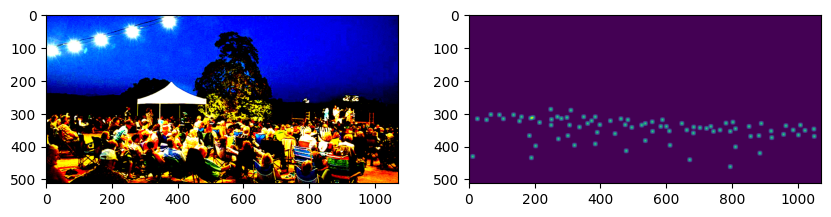

81.99971


In [6]:
crowd_dataset = CrowdsDataset(path = image_data_train_path.rsplit('/',1)[0], transform=train_transform)

crowd_dataset_val = CrowdsDataset(path = image_data_val_path.rsplit('/',1)[0], transform=val_transform)

#test on validation set
i=np.random.randint(0,num_images)
sample = crowd_dataset_val[57]
print(i,np.asarray(sample['image']).shape, sample['den'].shape, sample['fname'])
im1 = sample['image']
im2 = sample['den']
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Display the first image
axs[0].imshow(im1.permute(1, 2, 0))
# Display the second image
axs[1].imshow(im2.squeeze())
# Show the images
plt.show()
im2=im2.numpy()

print(np.sum(im2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image name:  (3, 256, 256) torch.Size([1, 256, 256]) ./processed_data/train/img\0947.jpg
max value image:  tensor(10.6057)
max value density map:  tensor(0.)


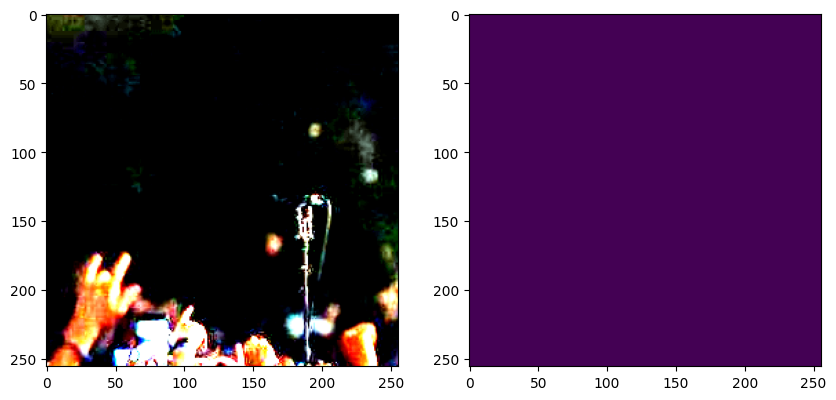

0.0


In [7]:
#test on train set
i=np.random.randint(0,num_images)
sample = crowd_dataset[i]
print("image name: ", np.asarray(sample['image']).shape, sample['den'].shape, sample['fname'])
im1 = sample['image']
im2 = sample['den']
print("max value image: ", torch.max(im1))
print("max value density map: ", torch.max(im2))
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Display the first image
axs[0].imshow(im1.permute(1, 2, 0))
# Display the second image
axs[1].imshow(im2.squeeze())
# Show the images
plt.show()
im2=im2.numpy()

print(np.sum(im2)/norm)

Text(0.5, 1.0, 'distribution of pixels')

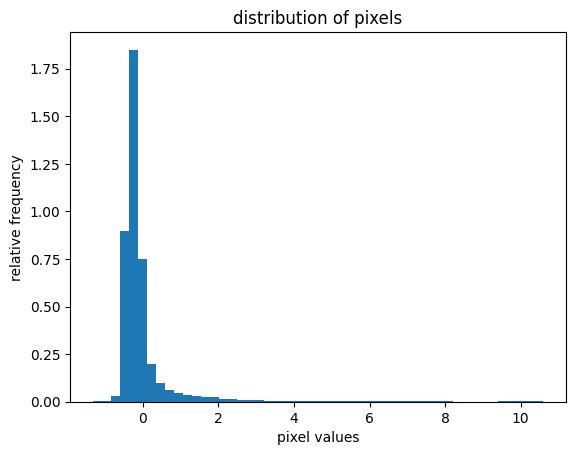

In [8]:
#distrubuzione dei valori dei pixel
plt.hist(im1.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")